<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/SelfAttention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [2]:
words = ["the", "cat", "sat", "on"]


In [3]:
import numpy as np
vectors = np.array([model[word] for word in words])
simple_avg = np.mean(vectors, axis=0)
closest_simple_avg = model.similar_by_vector(simple_avg, topn=10)


In [4]:
closest_simple_avg

[('sat', 0.6943046450614929),
 ('cat', 0.6297892332077026),
 ('sitting', 0.6263577342033386),
 ('sit', 0.5539282560348511),
 ('snake_slither', 0.528774619102478),
 ('on', 0.497178316116333),
 ('snoozed', 0.49494197964668274),
 ('the', 0.49338498711586),
 ('Sitting', 0.48764723539352417),
 ('Motioning', 0.48679301142692566)]

In [5]:
from scipy.special import softmax
dot_products = np.dot(vectors, vectors.T)
weights = softmax(dot_products, axis=1)
weighted_avg = np.dot(weights, vectors).mean(axis=0)
closest_weighted_avg = model.similar_by_vector(weighted_avg, topn=10)


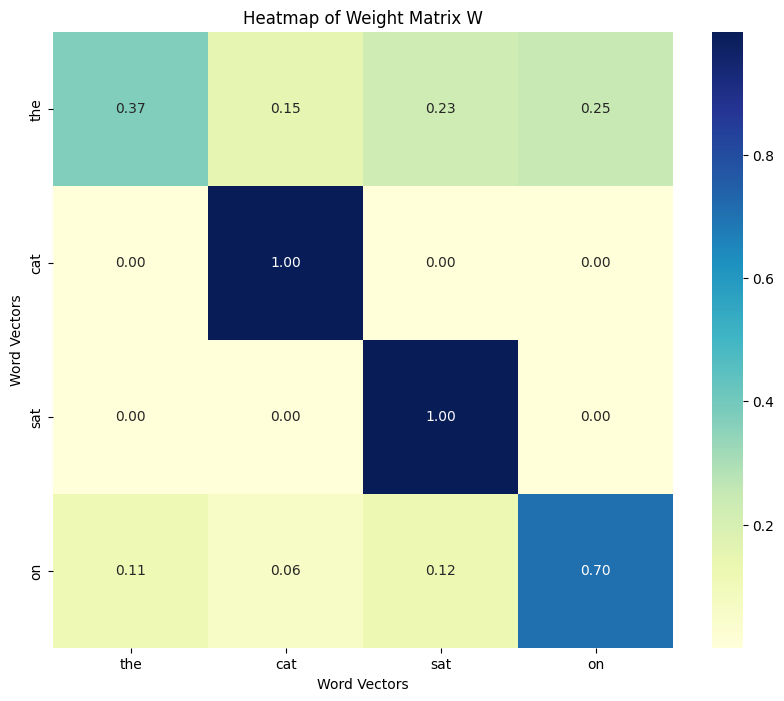

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'weights' is your matrix W calculated earlier
plt.figure(figsize=(10, 8))
sns.heatmap(weights, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=words, yticklabels=words)
plt.title("Heatmap of Weight Matrix W")
plt.xlabel("Word Vectors")
plt.ylabel("Word Vectors")
plt.show()


In [9]:
words = ["the", "cat", "sat", "on"]


def calculate_vectors_and_weights(words):
    # Extract vectors for the given words
    vectors = np.array([model.get_vector(word) for word in words if word in model])

    # Calculate the dot products matrix
    dot_products = np.dot(vectors, vectors.T)

    # Apply softmax on dot products to get weights for each vector
    weights = softmax(dot_products, axis=1)

    return vectors, weights

# Define your words here
words = ["the", "cat", "sat", "on"]

# Initial calculation
vectors, W = calculate_vectors_and_weights(words)